# Crime Data Analysis & Forecasting

This project analyzes crime data from 2020 to the present, sourced from the City of Los Angeles. It includes data cleaning, exploratory data analysis (EDA), geospatial and demographic analysis, and time series forecasting using ARIMA.

**Goals:**
- Understand crime trends and seasonal patterns
- Identify high-risk regions and crime types
- Analyze crime correlations with demographic variables
- Forecast future crime trends using time series models


In [120]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Acquisition

We download the dataset from the LA Open Data portal and load it using Pandas.


In [5]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

## Data Inspection

We inspect the structure of the dataset, check column names, types, and summary statistics to understand the scope of the data.


In [6]:
#Visually analyzing the first few rows
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [7]:
#Getting datatypes
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [8]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004973e+06,327247.000000,1.004978e+06,69158.000000,2314.000000,64.00000,1.004989e+06,1.004989e+06
mean,2.202215e+08,1.339902e+03,1.069173e+01,1.115633e+03,1.400349e+00,5.001569e+02,2.891710e+01,3.056199e+02,363.955300,4.999173e+02,958.099410,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510607e+02,6.110260e+00,6.111609e+02,4.899692e-01,2.052725e+02,2.199272e+01,2.193018e+02,123.734528,2.050730e+02,110.356503,52.350982,27.06985,1.610714e+00,5.582391e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [9]:
#Looking at first row
df.loc[0]

DR_NO                                           211507896
Date Rptd                          04/11/2021 12:00:00 AM
DATE OCC                           11/07/2020 12:00:00 AM
TIME OCC                                              845
AREA                                                   15
AREA NAME                                     N Hollywood
Rpt Dist No                                          1502
Part 1-2                                                2
Crm Cd                                                354
Crm Cd Desc                             THEFT OF IDENTITY
Mocodes                                              0377
Vict Age                                               31
Vict Sex                                                M
Vict Descent                                            H
Premis Cd                                           501.0
Premis Desc                        SINGLE FAMILY DWELLING
Weapon Used Cd                                        NaN
Weapon Desc   

## Data Cleaning

The dataset contains several missing values and formatting issues. Cleaning steps include:

- Removing duplicates
- Handling missing values
- Standardizing time and date formats
- Capitalizing and cleaning string columns
- Removing unrealistic age values (e.g., Victim Age ≤ 0)
- Encoding gender as M/F/O


In [10]:
#Handelling missing data
#Getting total number of missing values in each column 
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151620
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677742
Weapon Desc        677742
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002675
Crm Cd 4          1004925
LOCATION                0
Cross Street       850754
LAT                     0
LON                     0
dtype: int64

In [13]:
#Getting percentage of missing values from each column
(df.isnull().mean() * 100).round(2)

DR_NO              0.00
Date Rptd          0.00
DATE OCC           0.00
TIME OCC           0.00
AREA               0.00
AREA NAME          0.00
Rpt Dist No        0.00
Part 1-2           0.00
Crm Cd             0.00
Crm Cd Desc        0.00
Mocodes           15.09
Vict Age           0.00
Vict Sex          14.39
Vict Descent      14.39
Premis Cd          0.00
Premis Desc        0.06
Weapon Used Cd    67.44
Weapon Desc       67.44
Status             0.00
Status Desc        0.00
Crm Cd 1           0.00
Crm Cd 2          93.12
Crm Cd 3          99.77
Crm Cd 4          99.99
LOCATION           0.00
Cross Street      84.65
LAT                0.00
LON                0.00
dtype: float64

In [12]:
df.shape

(1004989, 28)

In [15]:
#Dropping columns where victim sex is unknown due to less percentage of missing values
#also because victim sex is important for data analysis
df.dropna(subset=['Vict Sex'],inplace=True)

In [17]:
df.shape

(860345, 28)

In [19]:
#Rechecking the percent wise distribution of null values
(df.isnull().mean() * 100).round(2)

DR_NO              0.00
Date Rptd          0.00
DATE OCC           0.00
TIME OCC           0.00
AREA               0.00
AREA NAME          0.00
Rpt Dist No        0.00
Part 1-2           0.00
Crm Cd             0.00
Crm Cd Desc        0.00
Mocodes            0.84
Vict Age           0.00
Vict Sex           0.00
Vict Descent       0.00
Premis Cd          0.00
Premis Desc        0.07
Weapon Used Cd    61.97
Weapon Desc       61.97
Status             0.00
Status Desc        0.00
Crm Cd 1           0.00
Crm Cd 2          91.98
Crm Cd 3          99.73
Crm Cd 4          99.99
LOCATION           0.00
Cross Street      85.13
LAT                0.00
LON                0.00
dtype: float64

In [20]:
#Dropping values where vict descent is null, since the cases where this is true are low
#and its an important metric for analysis
df.dropna(subset=['Vict Descent'],inplace=True)

In [21]:
(df.isnull().mean() * 100).round(2)

DR_NO              0.00
Date Rptd          0.00
DATE OCC           0.00
TIME OCC           0.00
AREA               0.00
AREA NAME          0.00
Rpt Dist No        0.00
Part 1-2           0.00
Crm Cd             0.00
Crm Cd Desc        0.00
Mocodes            0.84
Vict Age           0.00
Vict Sex           0.00
Vict Descent       0.00
Premis Cd          0.00
Premis Desc        0.07
Weapon Used Cd    61.97
Weapon Desc       61.97
Status             0.00
Status Desc        0.00
Crm Cd 1           0.00
Crm Cd 2          91.98
Crm Cd 3          99.73
Crm Cd 4          99.99
LOCATION           0.00
Cross Street      85.13
LAT                0.00
LON                0.00
dtype: float64

In [22]:
df.shape

(860328, 28)

In [23]:
#Dropping values where Mocodes is null, since the cases where this is true are low
#and its an important metric for analysis
df.dropna(subset=['Mocodes'],inplace=True)

In [24]:
df.shape

(853136, 28)

In [25]:
#keeping only original values in dr_no
df.drop_duplicates(subset=['DR_NO'],inplace=True)

In [27]:
#converting reported date to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y')

In [33]:
#extracting years and months from our dates
df['Rept Year']=df['Date Rptd'].dt.year
df['Rept Month']=df['Date Rptd'].dt.month
df['Occurance Year']=df['DATE OCC'].dt.year
df['Occurance Month']=df['DATE OCC'].dt.month

In [34]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Rept Year,Rept Month,Occurance Year,Occurance Month
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,2021,4,2020,11
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,2020,10,2020,10
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,2024,12,2020,10
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,2020,12,2020,12
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,2020,10,2020,9


In [36]:
#Writing a function that standardizes time format
temp=[]
def standardize_time(time):
    new_time=str(time) 
    if len(new_time)==1:
        new_time=new_time+':'+'00'
        #temp.append('l')
    elif len(new_time)==2: 
        #temp.append('m')
        if int(new_time)<=24:
            new_time=new_time+':'+'00'
            #temp.append('n')
        else:
            new_time='0'+new_time[0]+':'+'0'+new_time[1] 
            #temp.append('o')
    elif len(new_time)==3: 
        new_time='0'+new_time[0]+':'+new_time[1]+new_time[2] 
        #temp.append('p')
    else: new_time=new_time[0]+new_time[1]+':'+new_time[2]+new_time[3] 
        #temp.append('q')
    return new_time

In [37]:
df['TIME OCC'] = df['TIME OCC'].apply(standardize_time)

In [38]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Rept Year,Rept Month,Occurance Year,Occurance Month
0,211507896,2021-04-11,2020-11-07,08:45,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,2021,4,2020,11
1,201516622,2020-10-21,2020-10-18,18:45,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,2020,10,2020,10
2,240913563,2024-12-10,2020-10-30,12:40,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,2024,12,2020,10
3,210704711,2020-12-24,2020-12-24,13:10,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,2020,12,2020,12
4,201418201,2020-10-03,2020-09-29,18:30,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,2020,10,2020,9


In [39]:
#defining a function that capitalizes and removes trailing white 
#spaces from text based columns
temp=[]
def capitalize_and_remove_trailing_spaces(input_string):
    # Capitalize the string
    capitalized_string = str(input_string).upper() 
    #print(capitalized_string)
    
    # Remove trailing white spaces
    stripped_string = capitalized_string.rstrip()
    
    return(stripped_string) 
    #print(stripped_string)

In [40]:
df['AREA NAME']=df['AREA NAME'].apply(capitalize_and_remove_trailing_spaces)

In [41]:
df['Crm Cd Desc']=df['Crm Cd Desc'].apply(capitalize_and_remove_trailing_spaces)

In [42]:
df['Premis Desc']=df['Premis Desc'].apply(capitalize_and_remove_trailing_spaces)

In [43]:
df[['Crm Cd Desc','Premis Desc','AREA NAME','Weapon Desc']].head()

,Crm Cd Desc,Premis Desc,AREA NAME,Weapon Desc
0,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,N HOLLYWOOD,NaN
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",SIDEWALK,N HOLLYWOOD,KNIFE WITH BLADE 6INCHES OR LESS
2,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,VAN NUYS,NaN
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,STREET,WILSHIRE,NaN
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),ALLEY,PACIFIC,NaN


In [44]:
df['Weapon Desc']=df['Weapon Desc'].apply(capitalize_and_remove_trailing_spaces)

In [45]:
#Defining a function that gives us the total number of mocodes
def number_of_monocodes(input_string): 
    word_list=input_string.split() 
    return(len(word_list))

In [46]:
#counting the number of mocodes
df['Nos_of_mocodes']=df['Mocodes'].apply(number_of_monocodes)

In [47]:
def string_to_comma_separated(input_string):
    # Split the input string into a list based on whitespace 
    word_list = input_string.split()
    
    # Concatenate the list elements into a new string with a comma delimiter
    result_string = ', '.join(word_list) 
    return result_string

In [48]:
df['Mocodes']=df['Mocodes'].apply(string_to_comma_separated)

In [49]:
#Dropping cases where victim age <= 0 as part of outlier detection and action
df = df.drop(df[df['Vict Age'] <= 0].index)

In [50]:
df.shape

(729917, 33)

In [51]:
#Writing a function which encompasses genders other than 
#male or female onto other, as part of outlier detection 
def defining_gender(gender):
    if str(gender)=='M': 
        return('M')
    elif str(gender)=='F': 
        return('F')
    else: 
        return('O')

In [52]:
df['Vict Sex'].value_counts()

Vict Sex
M    367810
F    351515
X     10480
H       112
Name: count, dtype: int64

In [53]:
#standardizing gender column
df['Vict Sex_New']=df['Vict Sex'].apply(defining_gender)

In [54]:
df['Vict Sex_New'].value_counts()

Vict Sex_New
M    367810
F    351515
O     10592
Name: count, dtype: int64

In [55]:
#Writing a function that leaves only one whitespace between 
#complex string values
import re

def keep_single_space_between_words(input_string): 
    input_string=str(input_string)
    if input_string.isnumeric()==False:
        cleaned_string = re.sub(r'\s+', ' ', input_string) 
        
        return cleaned_string

In [56]:
df['LOCATION']=df['LOCATION'].apply(keep_single_space_between_words)

In [57]:
df['Cross Street']=df['Cross Street'].apply(keep_single_space_between_words)

In [60]:
#checking updated columns
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LOCATION,Cross Street,LAT,LON,Rept Year,Rept Month,Occurance Year,Occurance Month,Nos_of_mocodes,Vict Sex_New
0,211507896,2021-04-11,2020-11-07,08:45,15,N HOLLYWOOD,1502,2,354,THEFT OF IDENTITY,...,7800 BEEMAN AV,nan,34.2124,-118.4092,2021,4,2020,11,1,M
1,201516622,2020-10-21,2020-10-18,18:45,15,N HOLLYWOOD,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,ATOLL AV,N GAULT,34.1993,-118.4203,2020,10,2020,10,8,M
2,240913563,2024-12-10,2020-10-30,12:40,9,VAN NUYS,933,2,354,THEFT OF IDENTITY,...,14600 SYLVAN ST,nan,34.1847,-118.4509,2024,12,2020,10,1,M
3,210704711,2020-12-24,2020-12-24,13:10,7,WILSHIRE,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,6000 COMEY AV,nan,34.0339,-118.3747,2020,12,2020,12,1,F
4,201418201,2020-10-03,2020-09-29,18:30,14,PACIFIC,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,4700 LA VILLA MARINA,nan,33.9813,-118.4350,2020,10,2020,9,4,M


In [61]:
df[['DR_NO','Date Rptd','DATE OCC','TIME OCC','AREA NAME','Rept Year','Rept Month','Occurance Year','Occurance Month','Nos_of_mocodes','Crm Cd Desc','Mocodes','Vict Sex','LOCATION','Cross Street']].head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rept Year,Rept Month,Occurance Year,Occurance Month,Nos_of_mocodes,Crm Cd Desc,Mocodes,Vict Sex,LOCATION,Cross Street
0,211507896,2021-04-11,2020-11-07,08:45,N HOLLYWOOD,2021,4,2020,11,1,THEFT OF IDENTITY,0377,M,7800 BEEMAN AV,nan
1,201516622,2020-10-21,2020-10-18,18:45,N HOLLYWOOD,2020,10,2020,10,8,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","0416, 0334, 2004, 1822, 1414, 0305, 0319, 0400",M,ATOLL AV,N GAULT
2,240913563,2024-12-10,2020-10-30,12:40,VAN NUYS,2024,12,2020,10,1,THEFT OF IDENTITY,0377,M,14600 SYLVAN ST,nan
3,210704711,2020-12-24,2020-12-24,13:10,WILSHIRE,2020,12,2020,12,1,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344,F,6000 COMEY AV,nan
4,201418201,2020-10-03,2020-09-29,18:30,PACIFIC,2020,10,2020,9,4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),"1300, 0344, 1606, 2032",M,4700 LA VILLA MARINA,nan


In [62]:
#Writing a function that gives a month name instead of # month number
def number_to_month(month_number):
    # Define a dictionary mapping month numbers to month names
    month_dict = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    
    try:
        month_name = month_dict[month_number] 
        return month_name
    except KeyError:
        return None # Return None for invalid month numbers

In [63]:
df['Month Name']=df['Rept Month'].apply(number_to_month)

In [64]:
df['Month Name'].value_counts()

Month Name
January      66869
March        64857
February     64030
April        61299
July         60543
August       60518
October      60273
May          60219
June         58771
September    58340
December     57244
November     56954
Name: count, dtype: int64

In [65]:
#adding an additional column, would help in calculating the frequecy 
#of catagorical variables.
df['to_summarize']=1

In [66]:
df['DATE OCC'].value_counts()

DATE OCC
2020-01-01    1016
2023-01-01     949
2022-12-02     918
2023-02-01     891
2022-10-01     883
              ... 
2025-01-01       1
2025-02-19       1
2025-02-03       1
2025-02-24       1
2025-01-17       1
Name: count, Length: 1858, dtype: int64

In [67]:
#getting a day of the week from date of crime occurance
from datetime import datetime 
def day_of_the_week(date):
    date_str = date
    #date_obj = datetime.strptime(date_str, '%m-%d-%Y') 
    day_of_week = date_str.strftime('%A')
    return day_of_week

In [68]:
df['Day_of_week']=df['DATE OCC'].apply(day_of_the_week)

In [69]:
df['Day_of_week'].value_counts()

Day_of_week
Friday       110367
Saturday     108400
Monday       103017
Sunday       102975
Wednesday    102911
Thursday     102480
Tuesday       99767
Name: count, dtype: int64

## Exploratory Data Analysis

In this section, we explore crime trends across years, months, weekdays, and locations using visualizations.

Key questions addressed:
- What are the overall crime trends?
- Which days and months see more crimes?
- What are the most common types of crimes?
- How does crime distribution vary by region and gender?


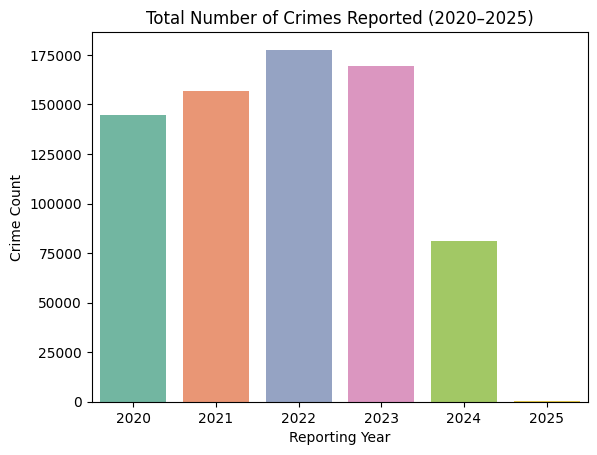

In [82]:
#Total Number of crimes reported from 2020 to 2023
sns.countplot(data=df,x='Rept Year', palette='Set2')
plt.title("Total Number of Crimes Reported (2020–2025)")
plt.xlabel("Reporting Year")
plt.ylabel("Crime Count")
plt.show()
#Observation: Shows an increasing trend in the amount of crime from 2020 to 2025, and a reduction in 2024 and 2025
#reduction could also be possible due to the inavailibility of future data from 2024

Text(0, 0.5, 'Number of Crimes Reported')

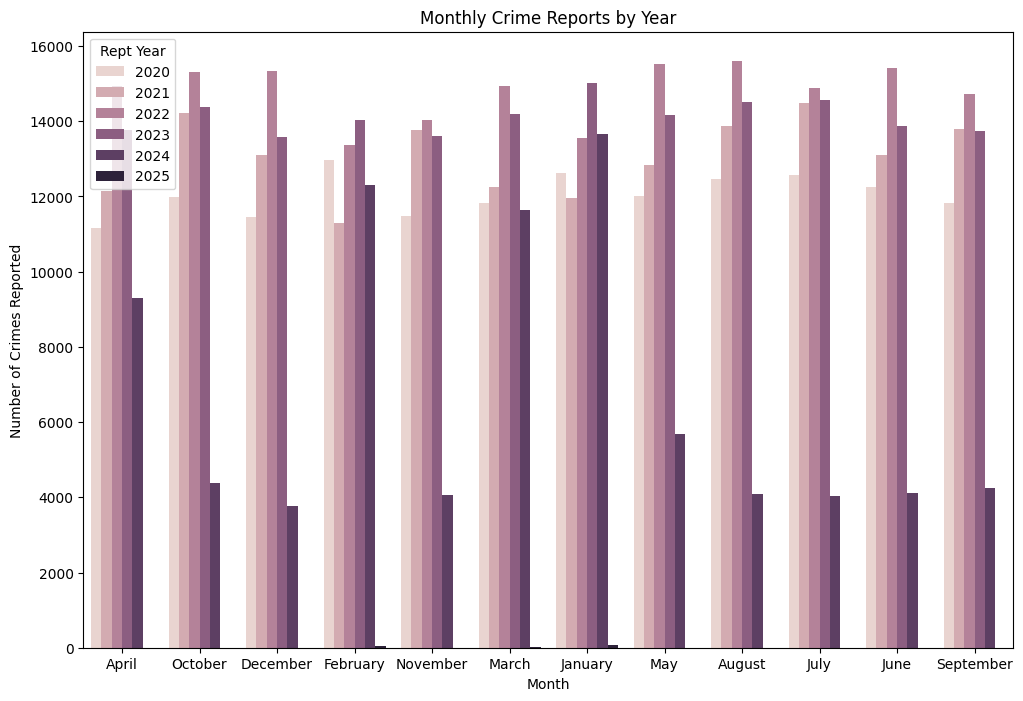

In [84]:
#Year wise data w.r.t month
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Month Name',hue='Rept Year')
plt.title("Monthly Crime Reports by Year")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Reported")

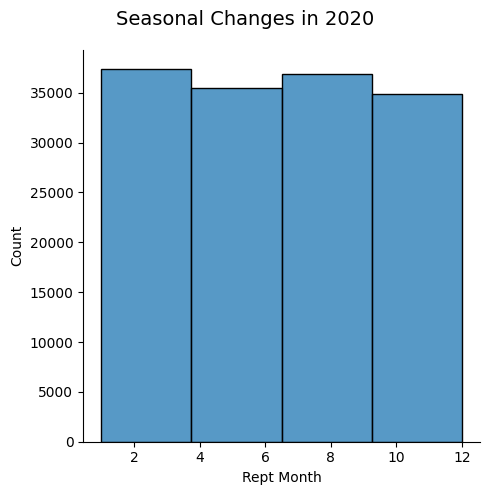

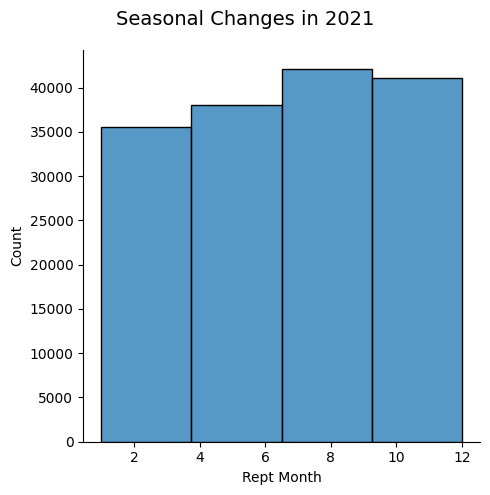

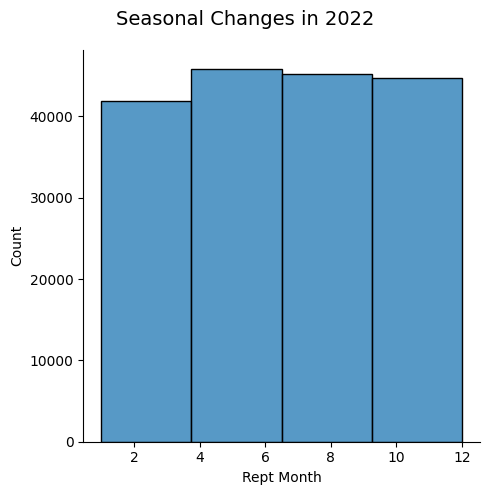

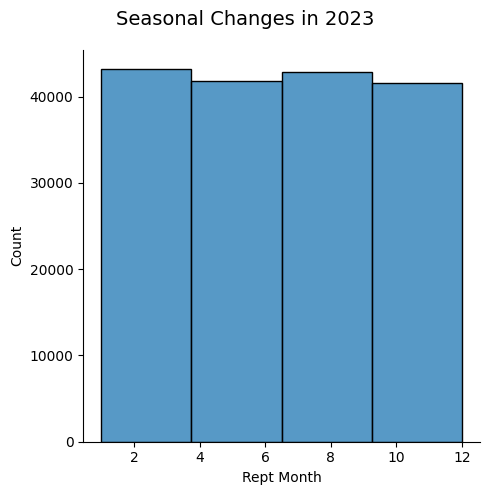

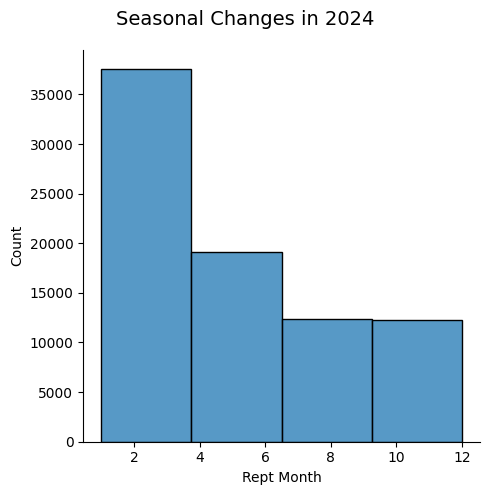

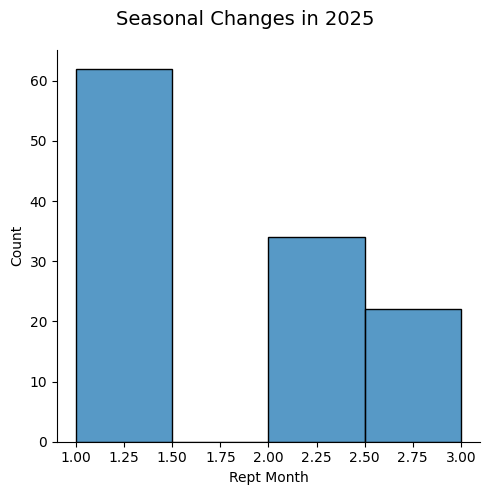

In [88]:
years = [2020, 2021, 2022, 2023, 2024, 2025]

for year in years:
    g = sns.displot(data=df[df['Rept Year'] == year], x='Rept Month', bins=4)
    g.fig.suptitle(f'Seasonal Changes in {year}', fontsize=14)
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.9)


In [90]:
#Saving the most common type of crime, top 5
temp_df=pd.DataFrame(df['Crm Cd Desc'].value_counts().head(5)) 
temp_df.reset_index(inplace=True) 
temp_df.columns=['Crime','amount_of_occurance'] 
temp_list=list(temp_df['Crime'])

In [91]:
df_1=df[['Crm Cd Desc','to_summarize','Occurance Year']][df['Crm Cd Desc'].isin(temp_list)]
df_2=pd.DataFrame(df_1.groupby(['Occurance Year','Crm Cd Desc']).sum()) 
df_2.reset_index(inplace=True)

In [92]:
df_2.columns=['Occurance Year','Crm_Cd_Desc','Amount_of_crime']

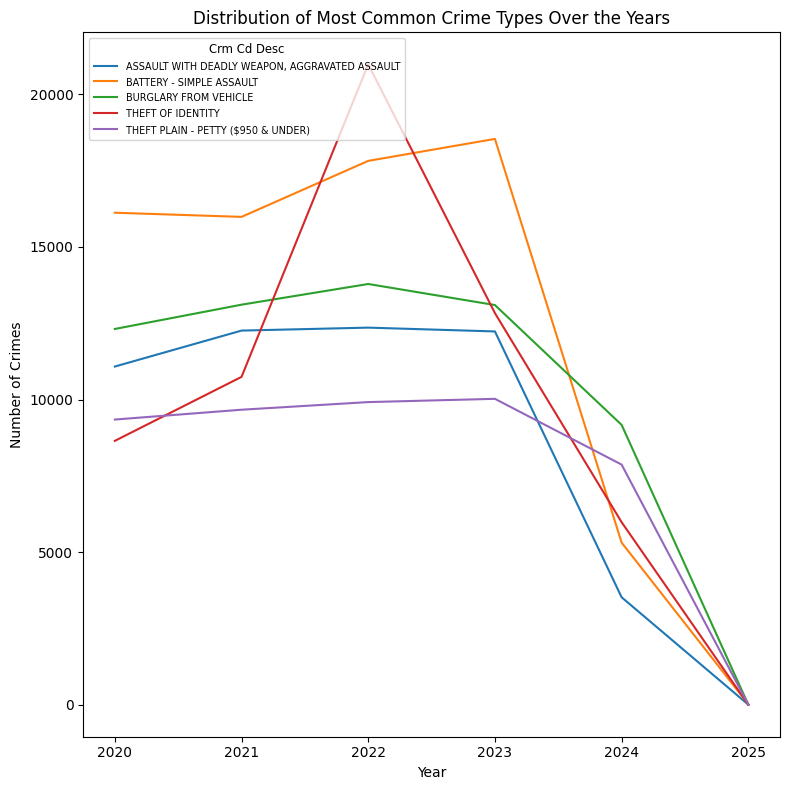

In [96]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=df_2, x="Occurance Year", y="Amount_of_crime", hue="Crm_Cd_Desc")

legend = plt.legend(loc="upper left", title="Crm Cd Desc", fontsize="small")
plt.setp(legend.get_title(), fontsize="small")
plt.setp(legend.get_texts(), fontsize="x-small")

plt.title("Distribution of Most Common Crime Types Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


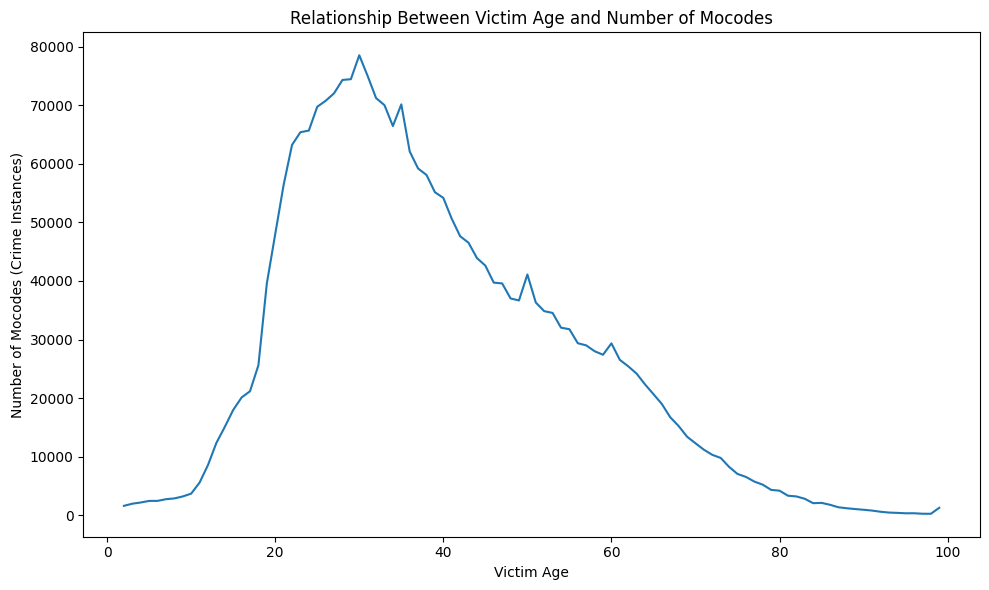

In [99]:
# Group by age and count mocodes
age_mocode = df.groupby('Vict Age')['Nos_of_mocodes'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_mocode, x='Vict Age', y='Nos_of_mocodes')
plt.title("Relationship Between Victim Age and Number of Mocodes")
plt.xlabel("Victim Age")
plt.ylabel("Number of Mocodes (Crime Instances)")
plt.tight_layout()
plt.show()


In [97]:
df_1=df[['Day_of_week','Crm Cd Desc']][df['Crm Cd Desc'].isin(temp_list)] 
#df_2=pd.DataFrame(df_1.groupby(['Occurance Year','Crm Cd Desc']).sum()) 
#df_2.reset_index(inplace=True)

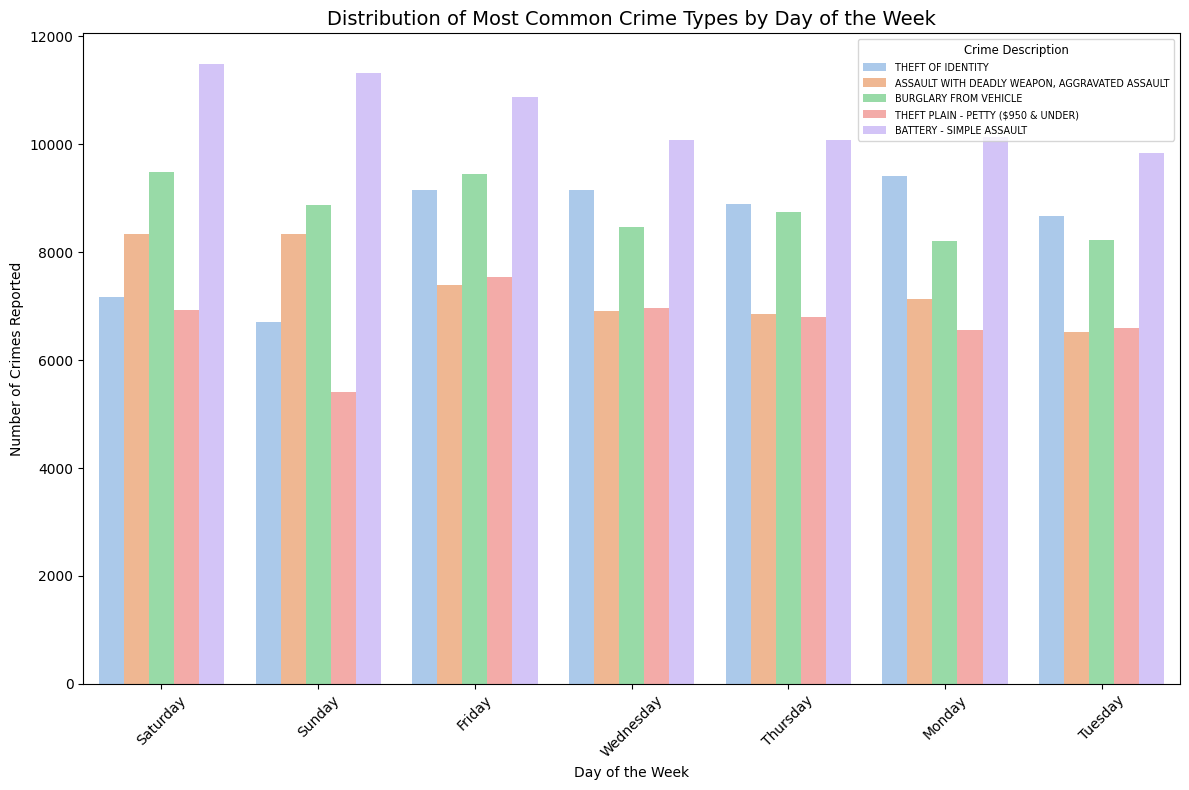

In [101]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_1, x='Day_of_week', hue='Crm Cd Desc', palette='pastel')

# Titles and labels
plt.title("Distribution of Most Common Crime Types by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes Reported")

# Legend handling
legend = plt.legend(loc="upper right", title="Crime Description", fontsize="small")
plt.setp(legend.get_title(), fontsize="small")
plt.setp(legend.get_texts(), fontsize="x-small")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


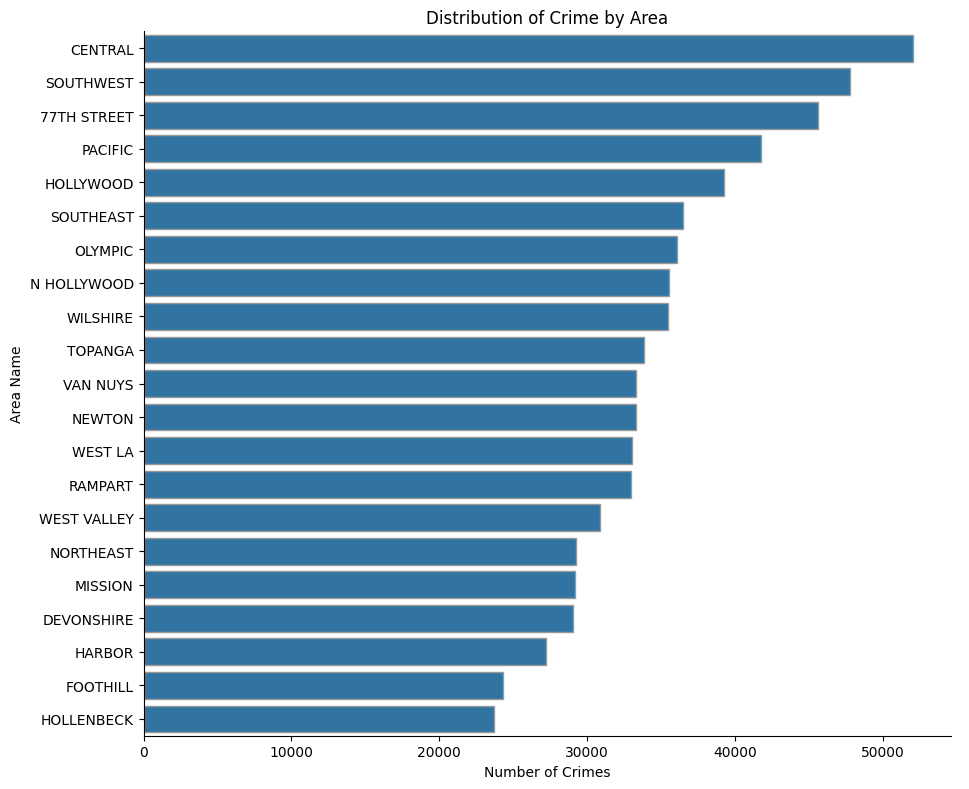

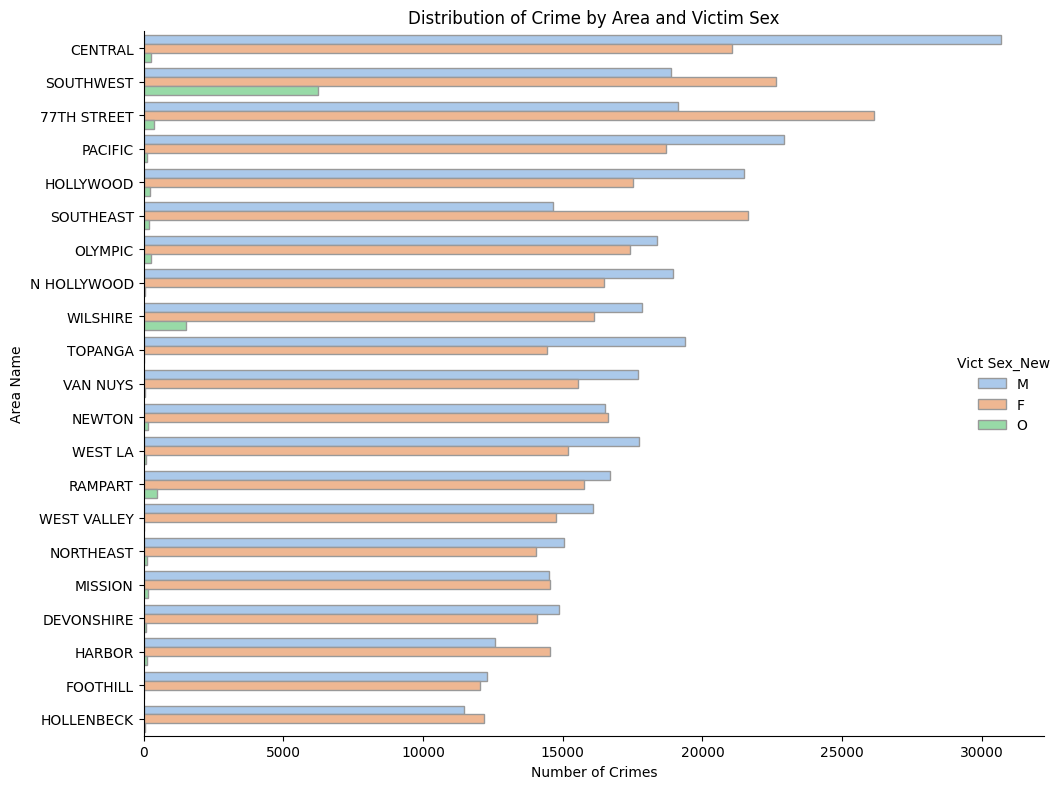

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Count of crimes by Area (no hue)
sns.catplot(
    data=df,
    y="AREA NAME",
    kind="count",
    height=8,
    aspect=1.2,
    edgecolor=".6",
    order=df['AREA NAME'].value_counts().index  # Order by count descending
)
plt.title("Distribution of Crime by Area")
plt.xlabel("Number of Crimes")
plt.ylabel("Area Name")
plt.tight_layout()
plt.show()

# Plot 2: Count of crimes by Area, separated by Victim Sex
sns.catplot(
    data=df,
    y="AREA NAME",
    hue="Vict Sex_New",
    kind="count",
    height=8,
    aspect=1.2,
    edgecolor=".6",
    palette="pastel",
    order=df['AREA NAME'].value_counts().index
)
plt.title("Distribution of Crime by Area and Victim Sex")
plt.xlabel("Number of Crimes")
plt.ylabel("Area Name")
plt.tight_layout()
plt.show()


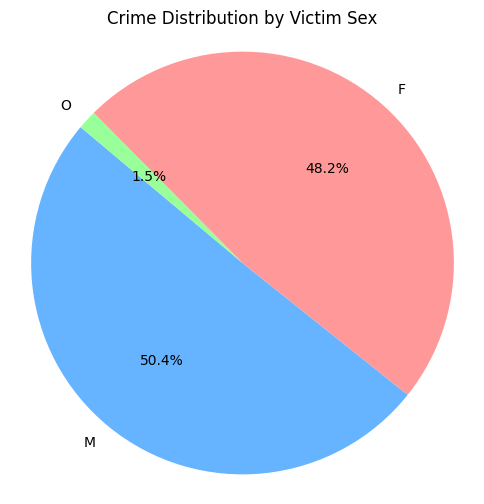

In [104]:
# Count occurrences in 'Vict Sex_New'
value_counts = df['Vict Sex_New'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff', '#ff9999', '#99ff99']  # optional: nicer colors
)
plt.title('Crime Distribution by Victim Sex')
plt.axis('equal')  # Draw pie as a circle
plt.show()


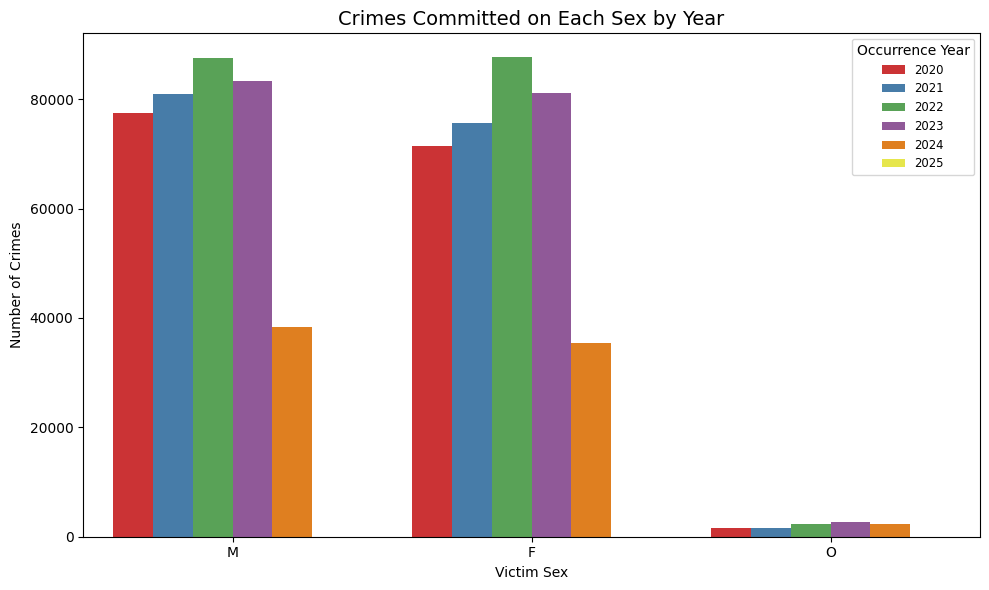

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Vict Sex_New', hue='Occurance Year', palette='Set1')

plt.title('Crimes Committed on Each Sex by Year', fontsize=14)
plt.xlabel('Victim Sex')
plt.ylabel('Number of Crimes')
plt.legend(title='Occurrence Year', fontsize='small', title_fontsize='medium')
plt.tight_layout()
plt.show()


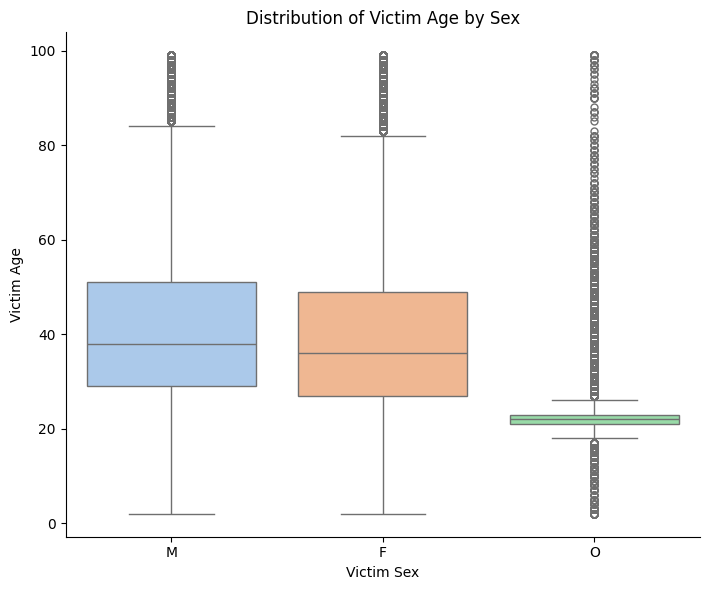

In [110]:
sns.catplot(
    x='Vict Sex_New',
    y='Vict Age',
    data=df,
    kind='box',
    palette='pastel',  
    height=6,
    aspect=1.2
)
plt.title('Distribution of Victim Age by Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Victim Age')
plt.tight_layout()
plt.show()


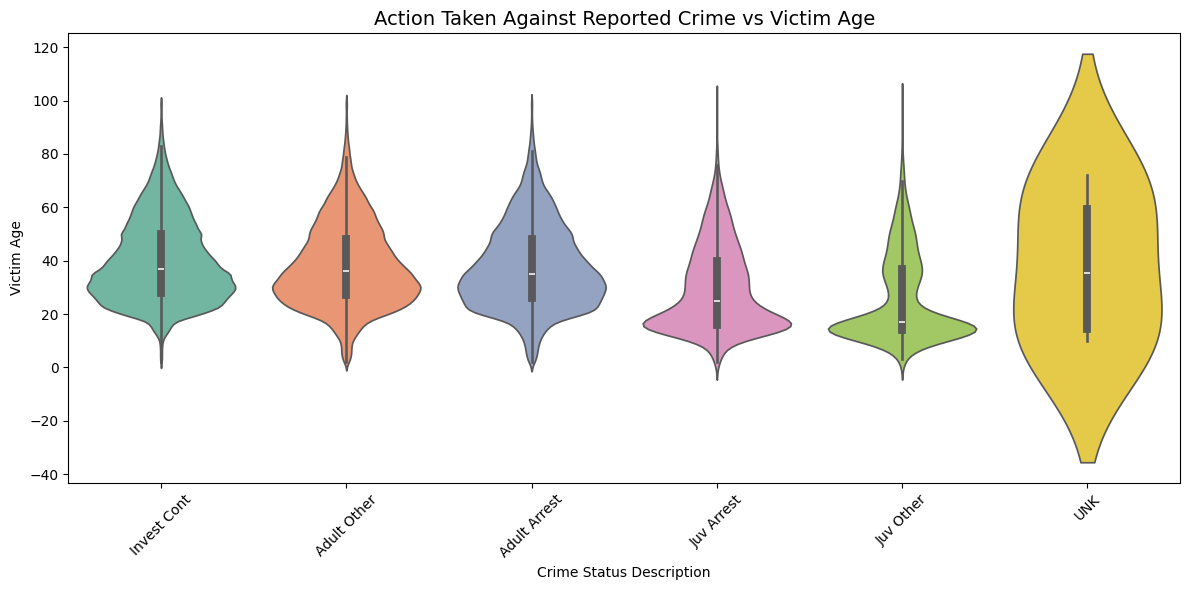

In [111]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Status Desc', y='Vict Age', data=df, palette='Set2')

plt.title('Action Taken Against Reported Crime vs Victim Age', fontsize=14)
plt.xlabel('Crime Status Description')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [112]:
df['TIME OCC']=np.where(df['TIME OCC']=='24:00','23:59',df['TIME OCC'])

In [113]:
df['TIME OCC_New'] = pd.to_datetime(df['TIME OCC'], format='%H:%M').dt.hour

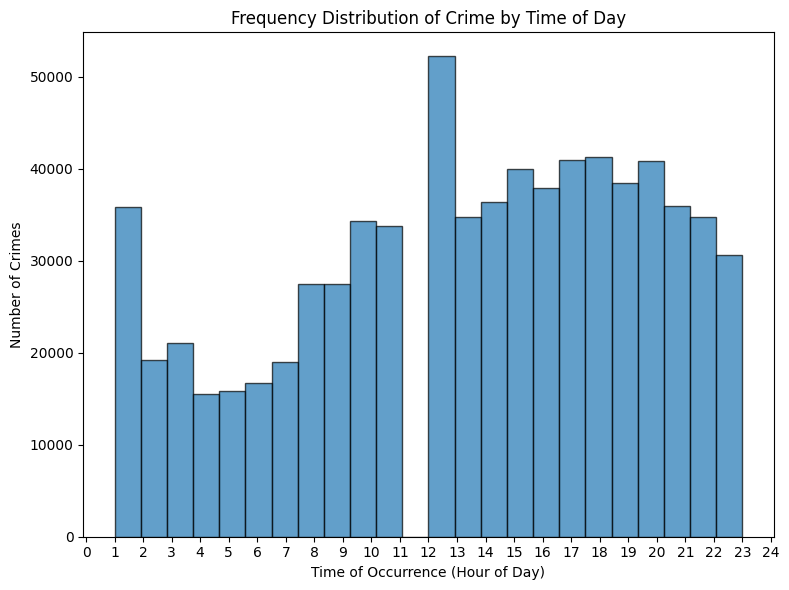

In [114]:
plt.figure(figsize=(8, 6))
plt.hist(df['TIME OCC_New'], bins=24, edgecolor='k', alpha=0.7)

plt.xlabel('Time of Occurrence (Hour of Day)')
plt.ylabel('Number of Crimes')
plt.title('Frequency Distribution of Crime by Time of Day')
plt.xticks(range(0, 25))  # Show ticks from 0 to 24
plt.tight_layout()
plt.show()


In [115]:
df['DATE OCC']=pd.to_datetime(df['DATE OCC'])

In [116]:
df_date=df[['to_summarize','DATE OCC']]
df_date_data=df_date.groupby(['DATE OCC']).sum()

In [117]:
df_date_data=pd.DataFrame(df_date_data)

In [118]:
df_date_data.columns

Index(['to_summarize'], dtype='object')

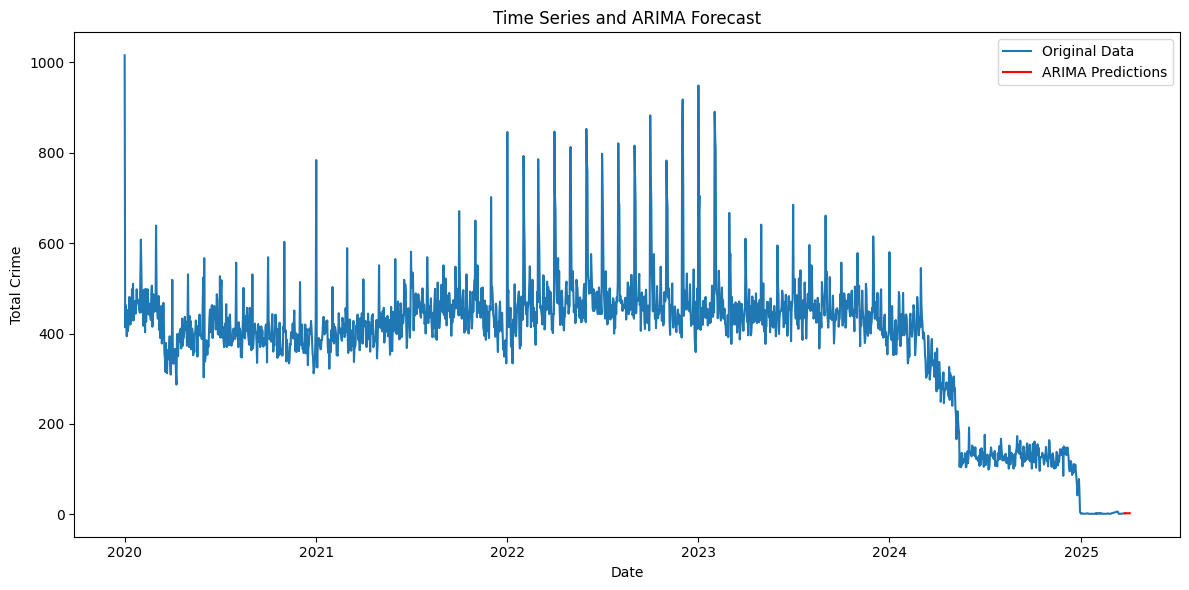

In [122]:
from statsmodels.tsa.arima.model import ARIMA
# Optional:
# from statsmodels.tsa.seasonal import seasonal_decompose 
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit an ARIMA model to the time series data
model = ARIMA(df_date_data['to_summarize'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 10 steps
predictions = model_fit.forecast(steps=10)

# Plot original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df_date_data.index, df_date_data['to_summarize'], label='Original Data')
plt.plot(
    pd.date_range(start=df_date_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D'),
    predictions,
    color='red',
    label='ARIMA Predictions'
)
plt.xlabel('Date')
plt.ylabel('Total Crime')
plt.title('Time Series and ARIMA Forecast')
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
print(predictions)

1858    2.077547
1859    2.438821
1860    2.604880
1861    2.171667
1862    2.043685
1863    2.067882
1864    2.143279
1865    2.227212
1866    2.250898
1867    2.204879
Name: predicted_mean, dtype: float64


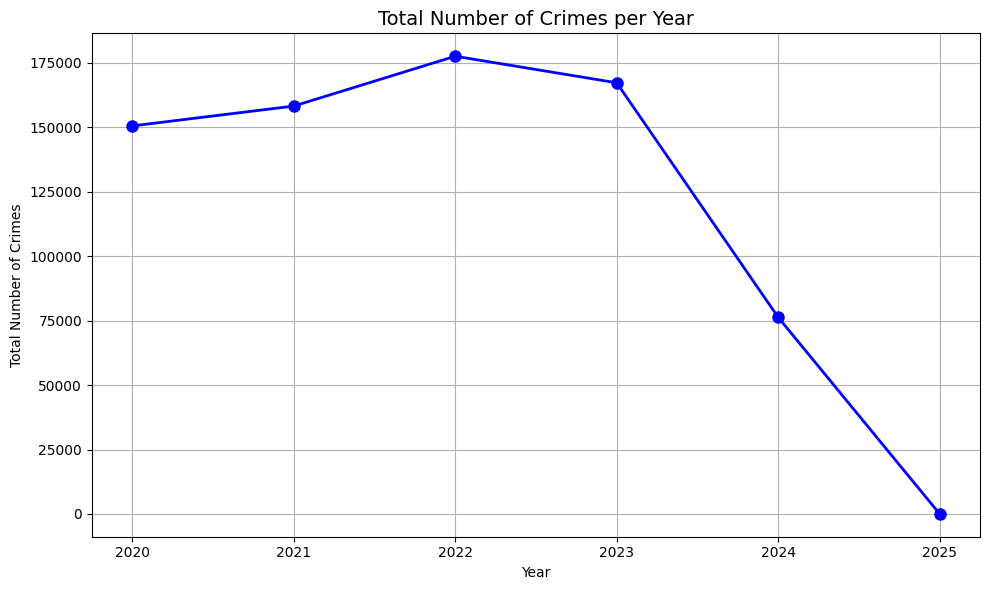

In [124]:
# Grouping and plotting overall crime trends per year
crime_per_year = df.groupby('Occurance Year')['to_summarize'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(
    crime_per_year['Occurance Year'],
    crime_per_year['to_summarize'],
    marker='o',
    color='b',
    linestyle='-',
    linewidth=2,
    markersize=8
)
plt.title('Total Number of Crimes per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
#Saving the most common type of crime, top 10
temp_df=pd.DataFrame(df['Crm Cd Desc'].value_counts().head(10)) 
temp_df.reset_index(inplace=True) 
temp_df.columns=['Crime','amount_of_occurance'] 
temp_list=list(temp_df['Crime'])

In [126]:
df_1=df[['Crm Cd Desc','to_summarize']][df['Crm Cd Desc'].isin(temp_list)] 
df_2=pd.DataFrame(df_1.groupby(['Crm Cd Desc']).sum()) 
df_2.reset_index(inplace=True)

In [127]:
df_2

,Crm Cd Desc,to_summarize
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51454
1,BATTERY - SIMPLE ASSAULT,73799
2,BURGLARY,39669
3,BURGLARY FROM VEHICLE,61478
4,INTIMATE PARTNER - SIMPLE ASSAULT,46233
5,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,35093
6,THEFT OF IDENTITY,59189
7,THEFT PLAIN - PETTY ($950 & UNDER),46822
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",27615
9,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",46306


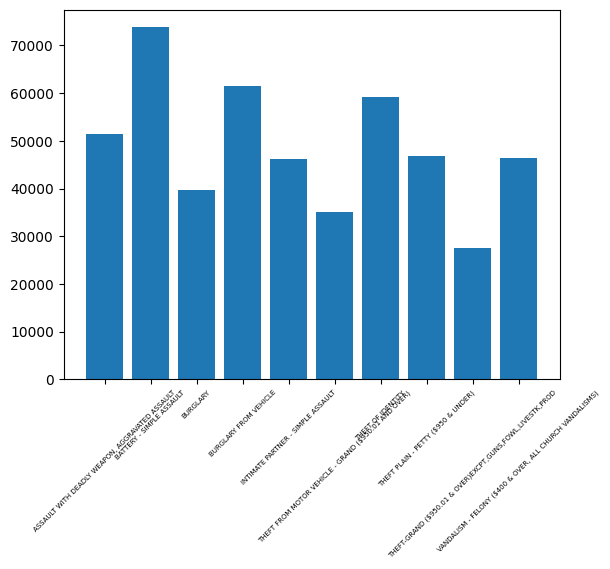

In [128]:
plt.bar(df_2['Crm Cd Desc'],df_2['to_summarize'])
plt.xticks(rotation=45, fontsize=5)
plt.show()

count       21.000000
mean     34757.952381
std       7303.840117
min      23718.000000
25%      29222.000000
50%      33324.000000
75%      36442.000000
max      52002.000000
Name: Crm Cd Desc, dtype: float64


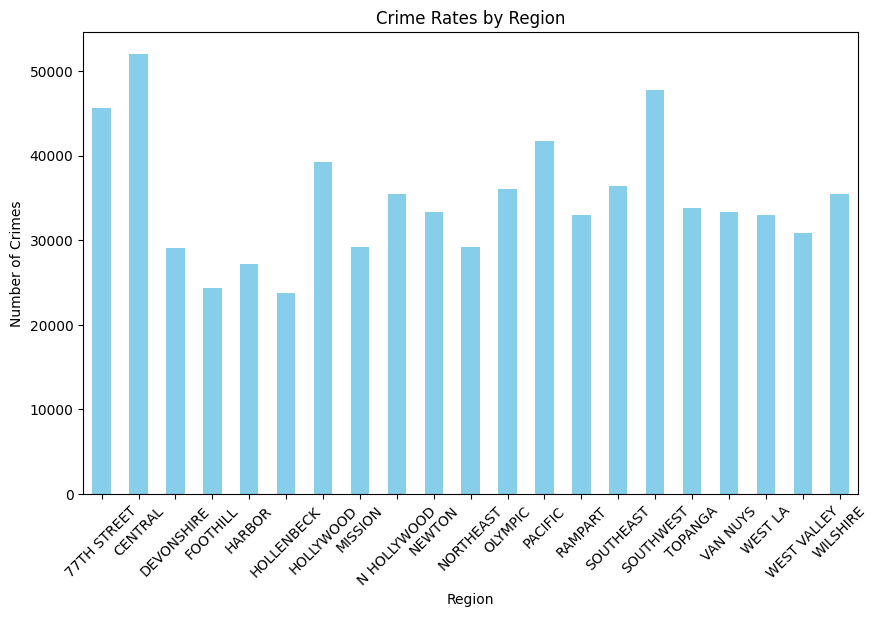

In [129]:
# Group the data by region (in this case, 'AREA NAME') and calculate the total␣ ↪number of crimes in each region
crime_by_region = df.groupby('AREA NAME')['Crm Cd Desc'].count()
# Calculate descriptive statistics for crime rates in different regions
crime_stats = crime_by_region.describe()
print(crime_stats)
# Example: Bar chart to compare crime rates between regions
plt.figure(figsize=(10, 6))
crime_by_region.plot(kind='bar', color='skyblue')
plt.title("Crime Rates by Region")
plt.xlabel("Region")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


Text(0.5, 0, 'Day of the Week')

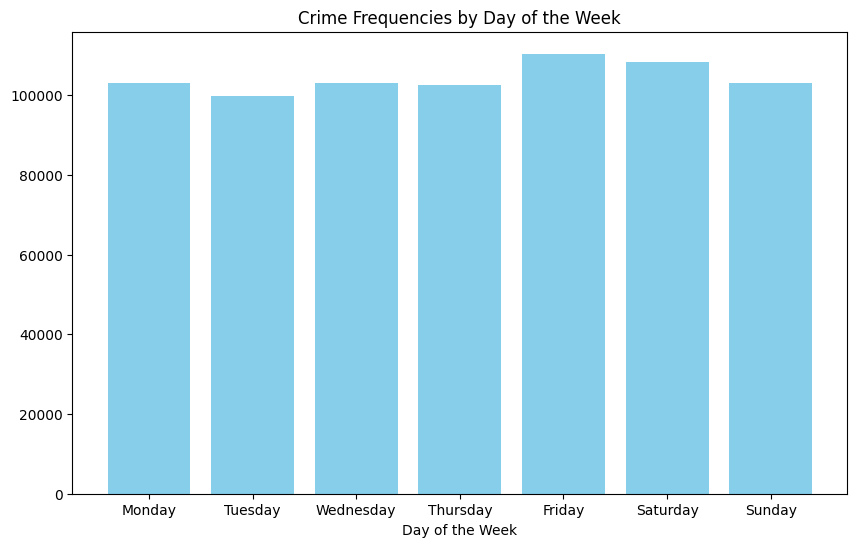

In [133]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Day_of_Week'] = df['DATE OCC'].dt.day_name()
crime_by_day = df['Day_of_Week'].value_counts().reset_index()
crime_by_day.columns = ['Day_of_Week', 'Number_of_Crimes']
crime_by_day = crime_by_day.sort_values(by='Day_of_Week',
key=lambda x: x.map({"Monday": 1,"Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6,"Sunday": 7}))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(crime_by_day['Day_of_Week'], crime_by_day['Number_of_Crimes'],color='skyblue')
plt.title('Crime Frequencies by Day of the Week') 
plt.xlabel('Day of the Week')

In [134]:
#Impact of major events

In [136]:
def concatinate_string(a,b): 
    c=str(a)+'-'+str(b) 
    return(c)

In [137]:
df['Year_Month'] = df.apply(lambda row: concatinate_string(row['Occurance Year'], row['Occurance Month']), axis=1)

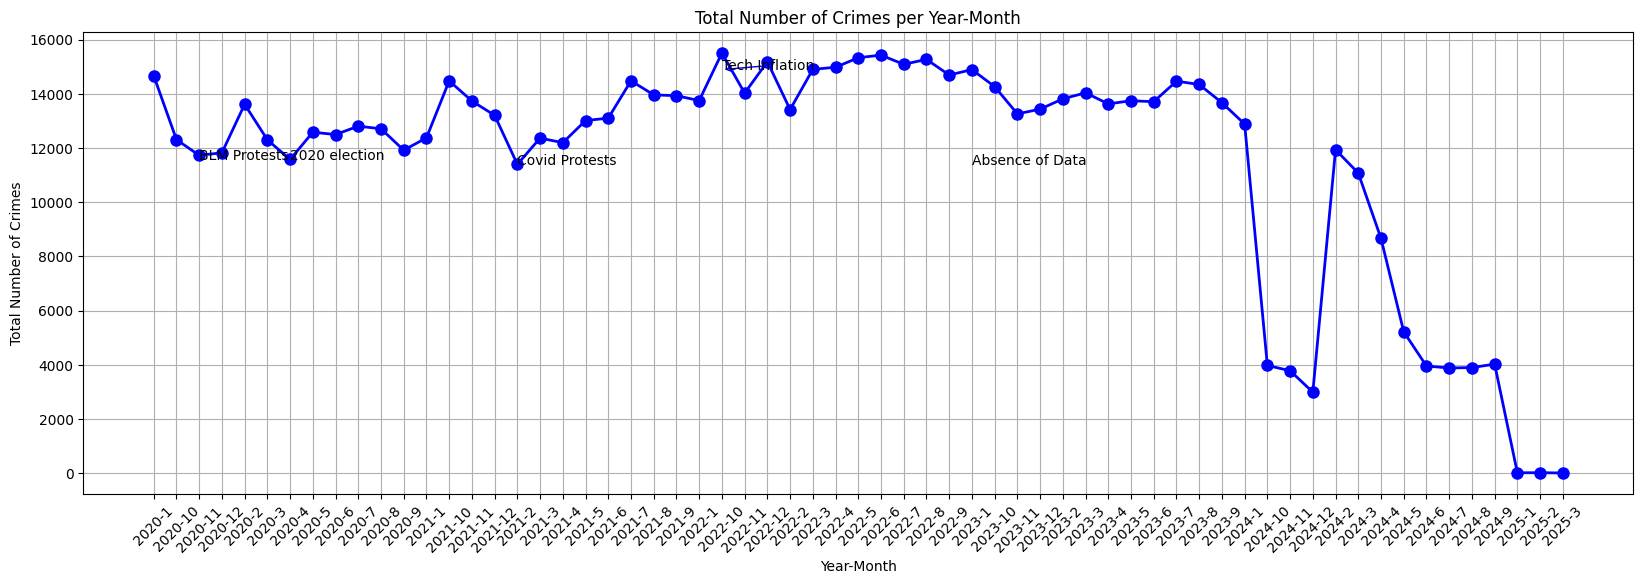

In [141]:
crime_per_year_new = df.groupby('Year_Month')['to_summarize'].sum().reset_index()
first_event=crime_per_year_new['to_summarize'][crime_per_year_new['Year_Month']=='2020-4']
second_event=crime_per_year_new['to_summarize'][crime_per_year_new['Year_Month']=='2021-2']
third_event=crime_per_year_new['to_summarize'][crime_per_year_new['Year_Month']=='2020-4']
fourth_event=crime_per_year_new['to_summarize'][crime_per_year_new['Year_Month']=='2023-1']
fifth_event=crime_per_year_new['to_summarize'][crime_per_year_new['Year_Month']=='2022-10']
plt.figure(figsize=(20, 6))
plt.plot(crime_per_year_new['Year_Month'],crime_per_year_new['to_summarize'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8) 
plt.title('Total Number of Crimes per Year-Month') 
plt.xlabel('Year-Month')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45) 
plt.grid(True) 
annotations = [
    {'text': 'BLM Protests', 'xy': ('2020-11',first_event)},
    {'text': 'Covid Protests', 'xy': ('2021-2', second_event)},
    {'text': '2020 election', 'xy': ('2020-4', third_event)},
    {'text': 'Absence of Data', 'xy': ('2023-1', second_event)},
    {'text': 'Tech Inflation', 'xy': ('2022-10', fourth_event),
     'arrowprops': {'arrowstyle': '->', 'color': 'blue'}},
]
for annotation in annotations: 
    plt.annotate(annotation['text'], xy=annotation['xy'],
                 arrowprops=annotation.get('arrowprops', None))
plt.show()

In [142]:
#Outliers and anamolies

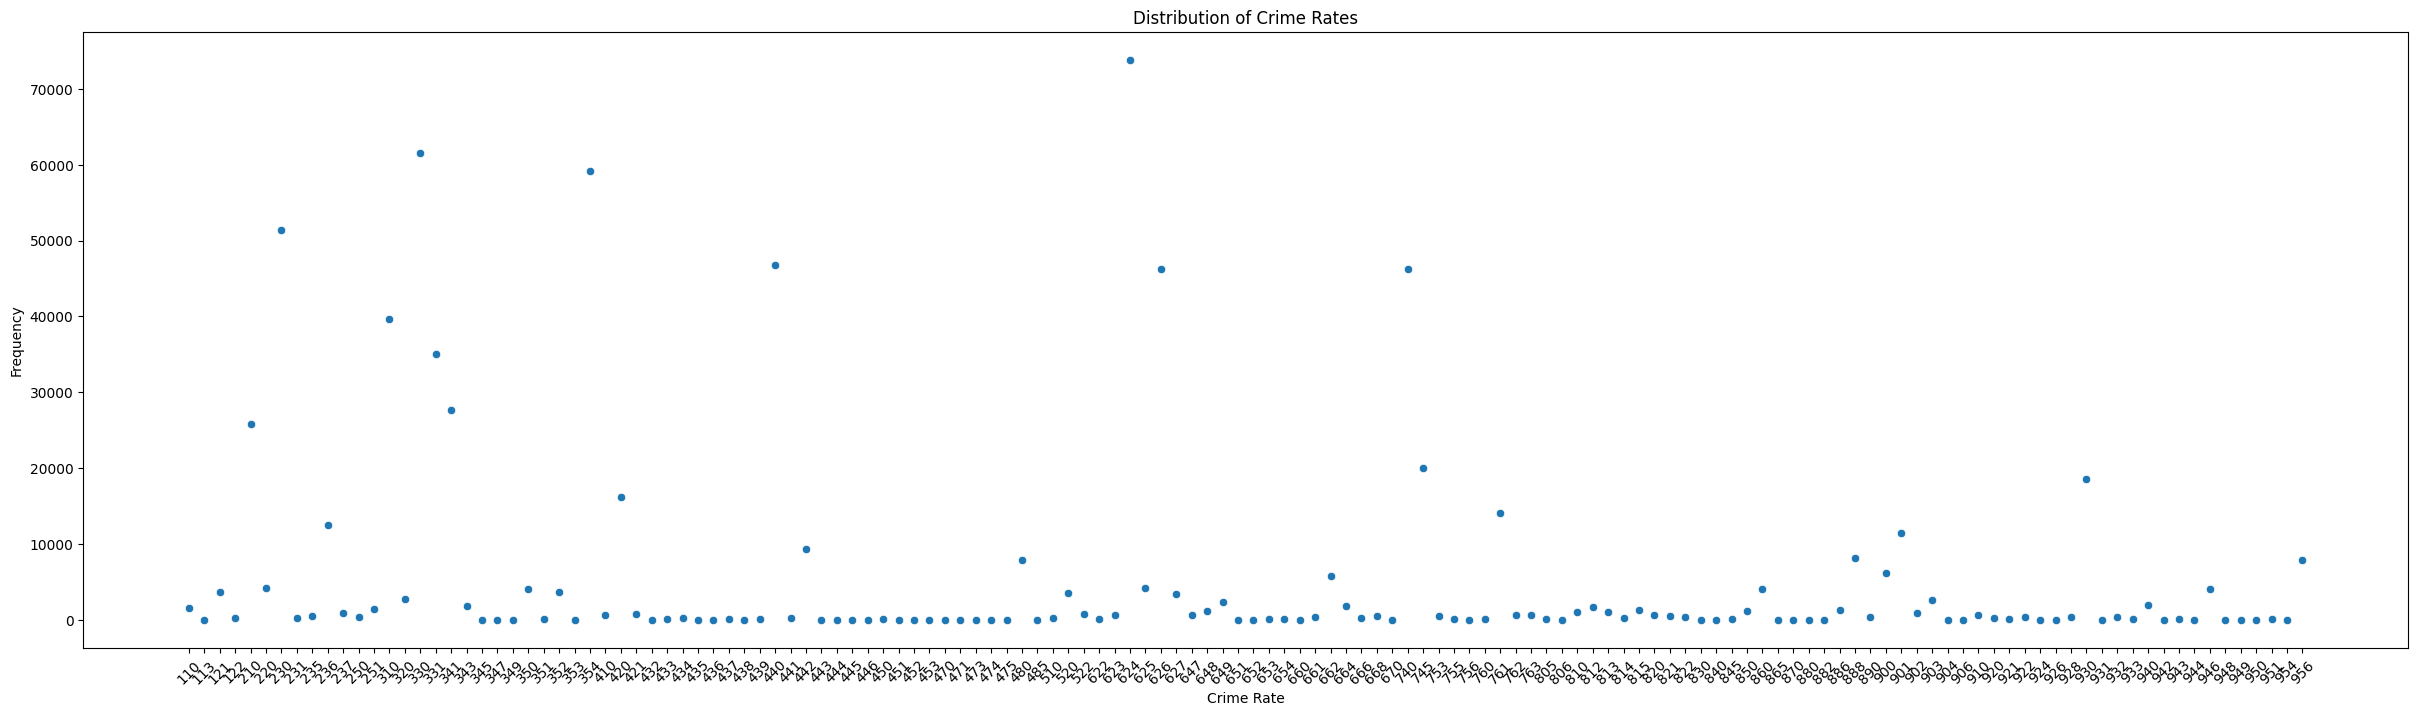

In [143]:
import seaborn as sns
crime_per_code = df.groupby('Crm Cd')['to_summarize'].sum().reset_index() 
crime_per_code['Crm Cd']=crime_per_code['Crm Cd'].astype(str) 
plt.figure(figsize=(30,8)) 
sns.scatterplot(data=crime_per_code,x=crime_per_code['Crm Cd'],y=crime_per_code['to_summarize']) 
plt.title('Distribution of Crime Rates') 
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [144]:
#Anomalies
crime_per_code['Crm Cd'][crime_per_code['to_summarize']>=35000].value_counts()

Crm Cd
230    1
310    1
330    1
331    1
354    1
440    1
624    1
626    1
740    1
Name: count, dtype: int64

In [145]:
#Demographic Factors

Age-Crime Correlation for Top 5 Crimes: 0.04621603277865597
Gender-Crime Chi-Squared Test p-value for Top 5 Crimes: 0.0


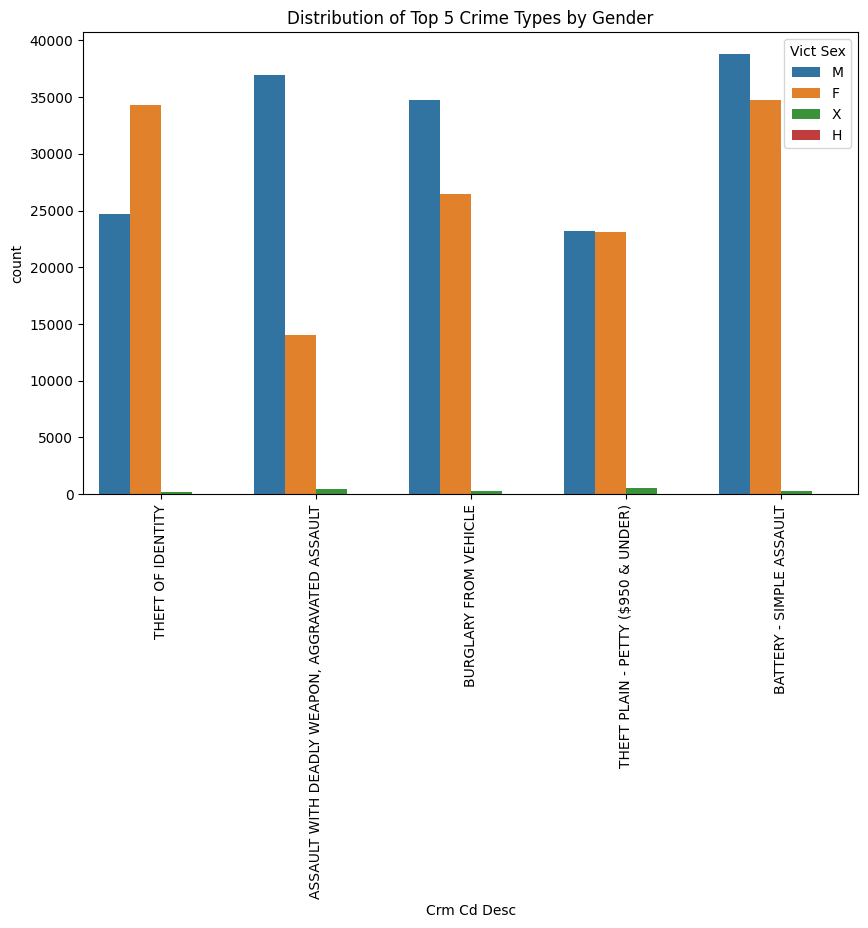

In [146]:
# Find the top 5 most frequent crime types
top_5_crimes = df['Crm Cd Desc'].value_counts().nlargest(5).index 

# Filter the dataset to include only the top 5 crime types
df_top_5_crimes = df[df['Crm Cd Desc'].isin(top_5_crimes)]

# Calculate the correlation between age and crime code for the top 5 crimes
age_crime_correlation = df_top_5_crimes['Vict Age'].corr(df_top_5_crimes['Crm Cd'])

# Perform a chi-squared test for gender and crime type (assuming 'Vict Sex' and 'Crm Cd' are categorical) for the top 5 crimes
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_top_5_crimes['Vict Sex'], df_top_5_crimes['Crm Cd'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print or analyze the correlations and test results for the top 5 crimes
print("Age-Crime Correlation for Top 5 Crimes:", age_crime_correlation)
print("Gender-Crime Chi-Squared Test p-value for Top 5 Crimes:", p)

# Visualize the distribution of the top 5 crime types by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_5_crimes, x='Crm Cd Desc', hue='Vict Sex')
plt.title("Distribution of Top 5 Crime Types by Gender")
plt.xticks(rotation=90)
plt.show()

Victim Descent-Crime Chi-Squared Test p-value for Top 5 Crimes: 0.0


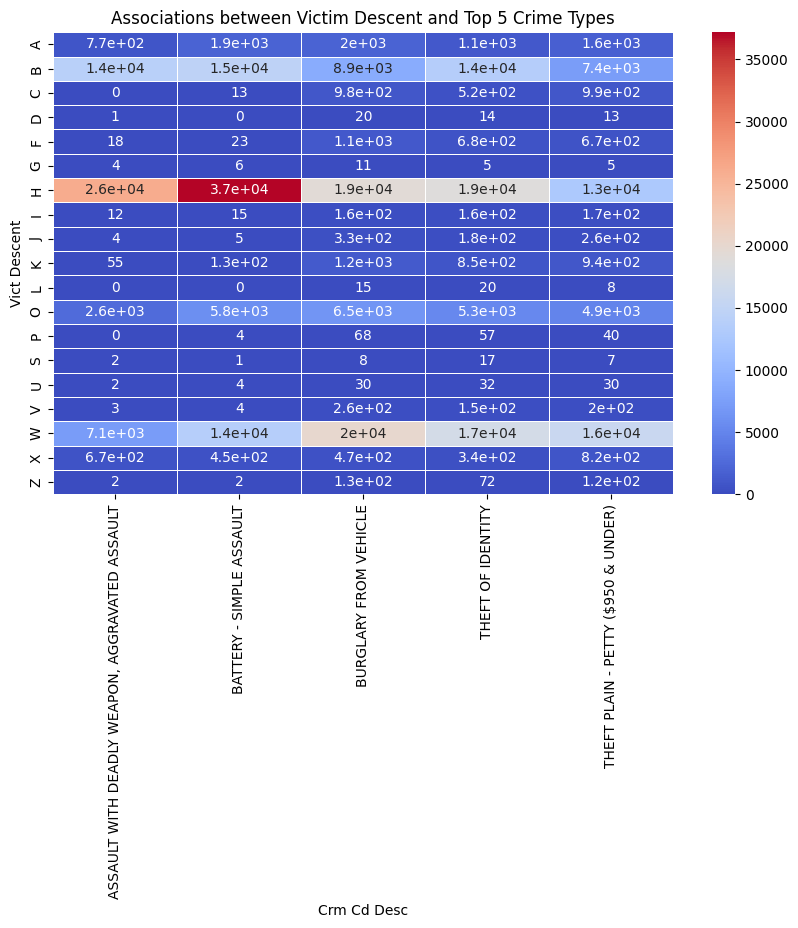

In [147]:
# Perform a chi-squared test for victim descent and crime type (assuming 'Vict Descent' and 'Crm Cd Desc' are categorical) for the top 5 crimes
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_top_5_crimes['Vict Descent'], df_top_5_crimes['Crm Cd Desc'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print or analyze the chi-squared test results
print("Victim Descent-Crime Chi-Squared Test p-value for Top 5 Crimes:", p)

# Example: Heatmap to visualize associations between victim descent and the top␣ ↪5 crime types
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title("Associations between Victim Descent and Top 5 Crime Types") 
plt.show()

Crime-Area Chi-Squared Test p-value for Top 5 Crimes and Top 5 Areas: 0.0


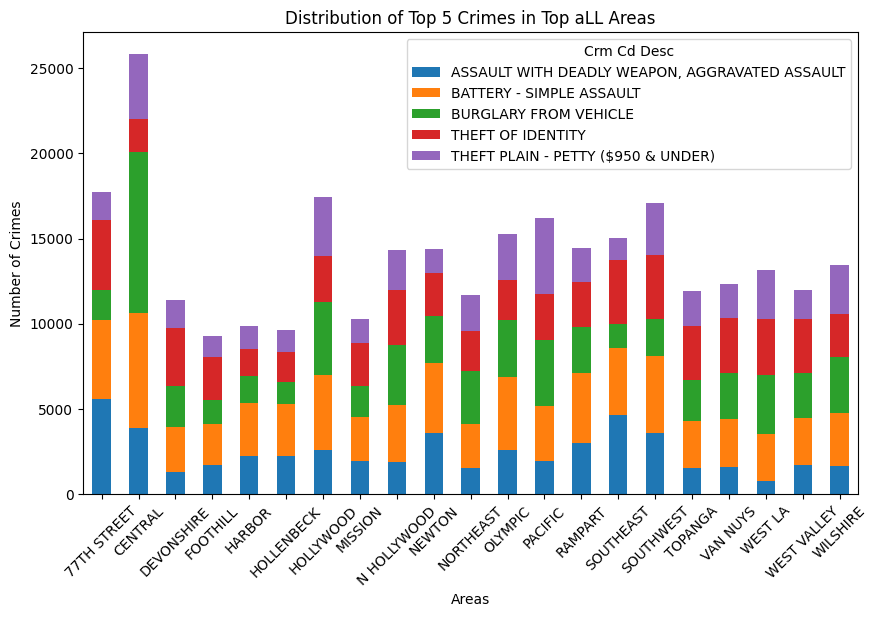

In [149]:
# Find the top 5 areas with the most crimes
top_5_areas = df['AREA NAME'].value_counts().nlargest(5).index

# Filter the dataset to include only the top 5 crimes and the top 5 areas
df_top_5_crimes = df[df['Crm Cd Desc'].isin(top_5_crimes)]
df_top_5_areas = df[df['AREA NAME'].isin(top_5_areas)]

# Perform a chi-squared test for the association between crime types and areas
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_top_5_crimes['Crm Cd Desc'], df_top_5_areas['AREA NAME'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print or analyze the chi-squared test results
print("Crime-Area Chi-Squared Test p-value for Top 5 Crimes and Top 5 Areas:",p)

# Create a pivot table to count the occurrences of each crime within each area
crime_area_pivot = pd.pivot_table(data=df_top_5_crimes, index='AREA NAME', columns='Crm Cd Desc', aggfunc='size', fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6)) 
crime_area_pivot.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel("Areas")
ax.set_ylabel("Number of Crimes")
plt.title("Distribution of Top 5 Crimes in Top aLL Areas")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

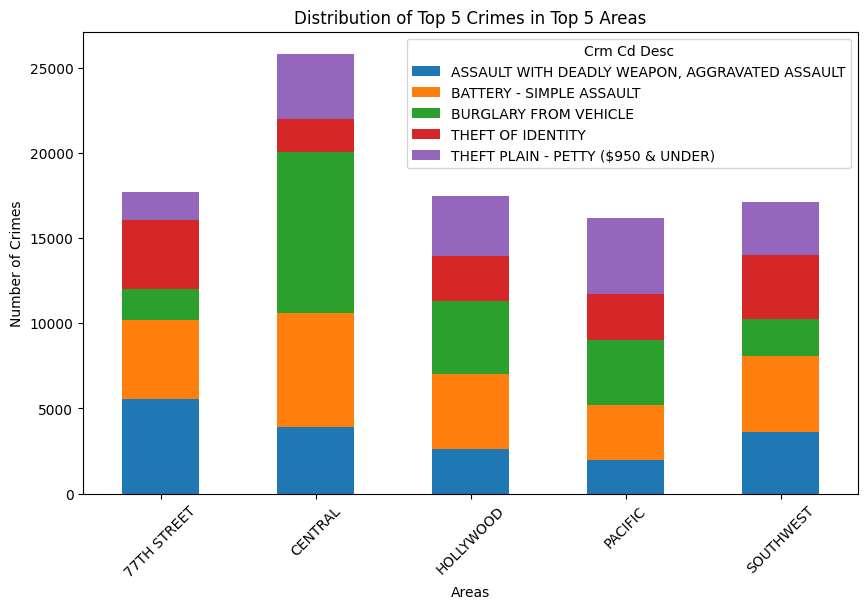

In [150]:
# Filter the dataset to include only the top 5 areas
top_5_areas = df_top_5_areas['AREA NAME'].value_counts().index[:5]
df_filtered = df_top_5_crimes[df_top_5_crimes['AREA NAME'].isin(top_5_areas)]

# Create a pivot table to count the occurrences of each crime within each area
crime_area_pivot = pd.pivot_table(data=df_filtered, index='AREA NAME', columns='Crm Cd Desc', aggfunc='size', fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6)) 
crime_area_pivot.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel("Areas")
ax.set_ylabel("Number of Crimes")
plt.title("Distribution of Top 5 Crimes in Top 5 Areas")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

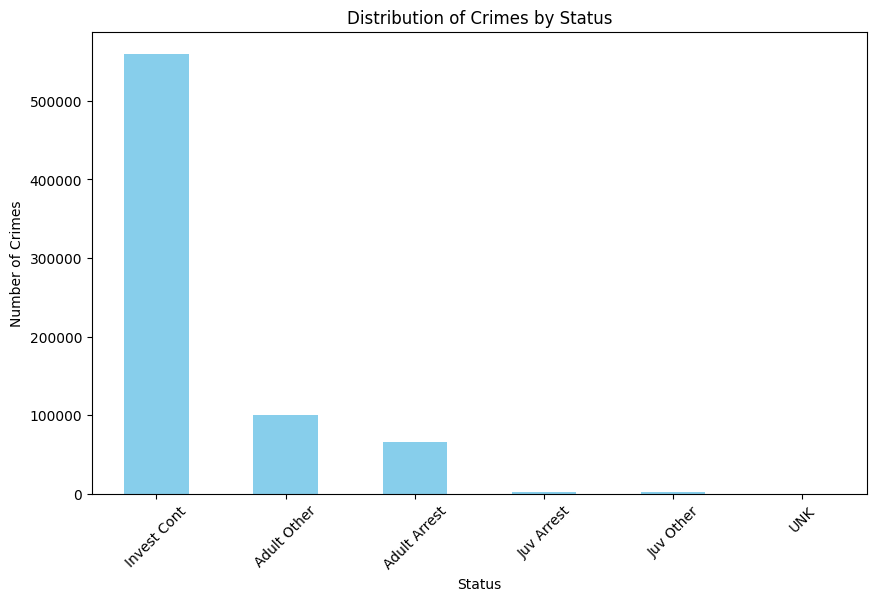

In [151]:
# Calculate the total number of crimes in each status category
crime_status_counts = df.groupby('Status Desc').size()
# Calculate the total number of crimes in each status category
crime_status_counts = df['Status Desc'].value_counts()
# Create a bar chart to visualize the distribution of crimes in different␣ ↪status categories
plt.figure(figsize=(10, 6))
crime_status_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Crimes by Status")
plt.xlabel("Status")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

In [152]:
#Predicting future trends

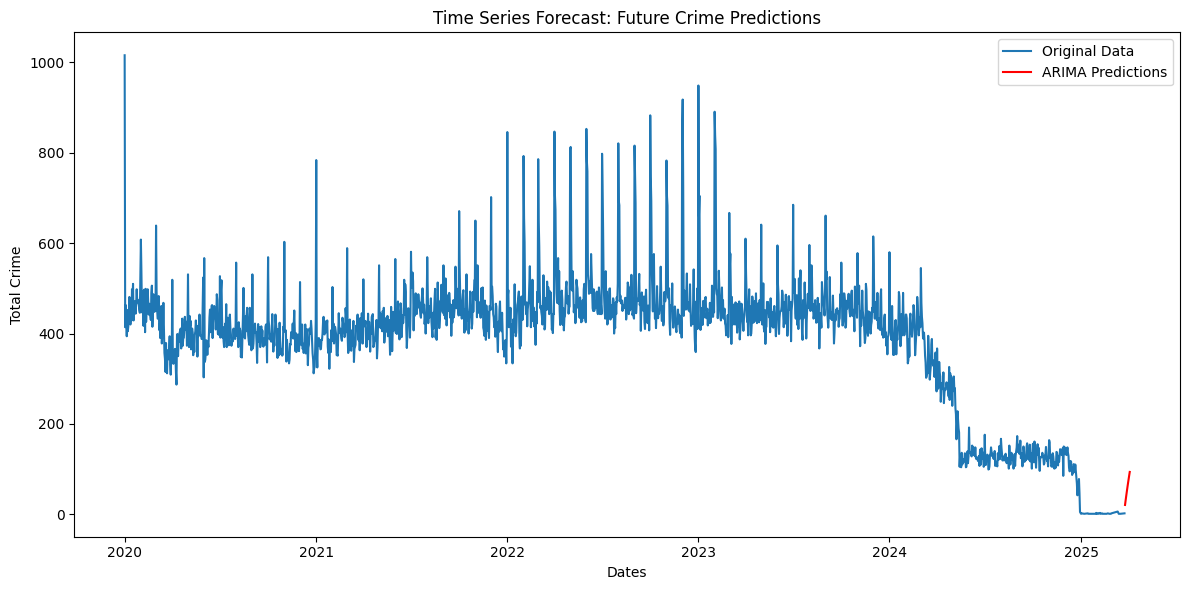

In [160]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Fit ARIMA model
model = ARIMA(df_date_data['to_summarize'], order=(1, 0, 1))
model_fit = model.fit()

# Forecast the next 10 values
predictions = model_fit.forecast(steps=10)

# Create future date index starting one day after the last date
future_dates = pd.date_range(start=df_date_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

# Plot original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df_date_data.index, df_date_data['to_summarize'], label='Original Data')
plt.plot(future_dates, predictions, color='red', label='ARIMA Predictions')

plt.xlabel('Dates')
plt.ylabel('Total Crime')
plt.title('Time Series Forecast: Future Crime Predictions')
plt.legend()
plt.tight_layout()
plt.show()


In [165]:
# Create a date range starting from the next day after your dataset ends
future_dates = pd.date_range(start=df_date_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

# Assign future dates as the index of predictions
predictions.index = future_dates

In [166]:
predictions

2025-03-26    20.570409
2025-03-27    29.502302
2025-03-28    38.219897
2025-03-29    46.728335
2025-03-30    55.032635
2025-03-31    63.137694
2025-04-01    71.048292
2025-04-02    78.769095
2025-04-03    86.304657
2025-04-04    93.659422
Freq: D, Name: predicted_mean, dtype: float64